In [16]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size=4
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


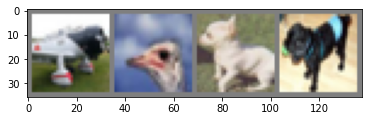

planebird dog  dog  


In [3]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
dataiter=iter(trainloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(''.join(f'{classes[labels[j]]:5s}'for j in range(batch_size)))

In [23]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
net=Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
import torch.optim as optim
criterion =nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

for epoch in range(10):
  running_loss=0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs=inputs.to(device)
    labels=labels.to(device)
    optimizer.zero_grad()
    outputs=net(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    if i %2000==1999:
      print(f'[{epoch+1},{i+1:5d}] loss: {running_loss/2000:.3f}')
      running_loss=0.0
print('finished')

[1, 2000] loss: 2.190
[1, 4000] loss: 1.825
[1, 6000] loss: 1.670
[1, 8000] loss: 1.568
[1,10000] loss: 1.503
[1,12000] loss: 1.465
[2, 2000] loss: 1.393
[2, 4000] loss: 1.345
[2, 6000] loss: 1.321
[2, 8000] loss: 1.324
[2,10000] loss: 1.282
[2,12000] loss: 1.262
[3, 2000] loss: 1.200
[3, 4000] loss: 1.199
[3, 6000] loss: 1.186
[3, 8000] loss: 1.170
[3,10000] loss: 1.177
[3,12000] loss: 1.179
[4, 2000] loss: 1.103
[4, 4000] loss: 1.110
[4, 6000] loss: 1.095
[4, 8000] loss: 1.080
[4,10000] loss: 1.098
[4,12000] loss: 1.089
[5, 2000] loss: 1.025
[5, 4000] loss: 1.033
[5, 6000] loss: 1.030
[5, 8000] loss: 1.023
[5,10000] loss: 1.021
[5,12000] loss: 1.031
[6, 2000] loss: 0.941
[6, 4000] loss: 0.974
[6, 6000] loss: 0.980
[6, 8000] loss: 0.978
[6,10000] loss: 0.990
[6,12000] loss: 0.983
[7, 2000] loss: 0.897
[7, 4000] loss: 0.906
[7, 6000] loss: 0.926
[7, 8000] loss: 0.943
[7,10000] loss: 0.962
[7,12000] loss: 0.950
[8, 2000] loss: 0.855
[8, 4000] loss: 0.873
[8, 6000] loss: 0.907
[8, 8000] 

In [27]:
path='./cifar_net.pth'
torch.save(net.state_dict(),path)

In [31]:
net=Net()
net.to(device)
net.load_state_dict(torch.load(path))
images.to(device)
outputs=net(images)


RuntimeError: ignored

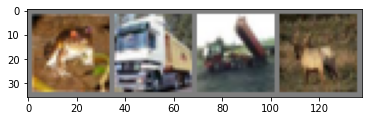

groudtruth: frog trucktruckdeer 


In [ ]:
dataiter=iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('groudtruth:',''.join(f'{classes[labels[j]]:5s}'for j in range(4)))

In [ ]:
correct_pred={classname:0 for classname in classes}
total_pred={classname:0 for classname in classes}
with torch.no_grad():
  for data in testloader:
    images,labels=data
    images=images.to(device)
    labels=labels.to(device)
    outputs=net(images)
    _,predictions=torch.max(outputs,1)
    for label,prediction in zip(labels,predictions):
      if label==predictions:
        correct_pred[classes[label]]+=1
      total_pred[classes[label]]+=1
for clas,corr in correct_pred.items():
  acc=100*float(corr)/total_pred[clas]
  print(f'acc for class:{clas:5s} is {acc:.1f}%')

Q2